# Análisis de Series Temporales . Trabajo Final

### Contenidos
1. Espectrograma
2. Wavelets
4. EMD
5. EEMD
6. Transformada cruzada y coherencia ondita

### Introducción
En el presente cuaderno se busca mostrar de manera suscinta el modo en que diversas técnicas de análiss de series temporales operan sobre señales de infrasonido y sismografo. Para ello se exponen brevemente los fundamentos de cada técnica, y se muestra su implementación en Python. Para los ejemplos se utilizan señales de infrasonido y sismógrafo, en una traza temporal que registra un evento volcano-tectónico (VT), ocurrido en el volcán Peteroa, en el departamento de Malargüe, provincia de Mendoza, el día 28 de diciembre de 2017.<br>

In [1]:
import numpy as np

with open('20170328_22_time.txt') as time:
    dates = time.read().splitlines()
print(f'{dates[0]:<30} ==> {type(dates[0])}')

d64 = np.array(dates, dtype='datetime64')
print(f'{d64[0]:<30} ==> {np.dtype(d64[0])}')

utc = d64.astype('O')
print(f'{utc[0]:<30} ==>{type(utc[0])}')

with open('20170328_22_signal.txt') as signal_str:
    signal = list(map(float, signal_str))
print(f'{signal[0]:<30} ==> {type(signal[0])}')

sampling_frequency = 100

2017-03-28 22:39:44.278077     ==> <class 'str'>
2017-03-28T22:39:44.278077     ==> datetime64[us]
<30 ==><class 'datetime.datetime'>
1.19166666667                  ==> <class 'float'>


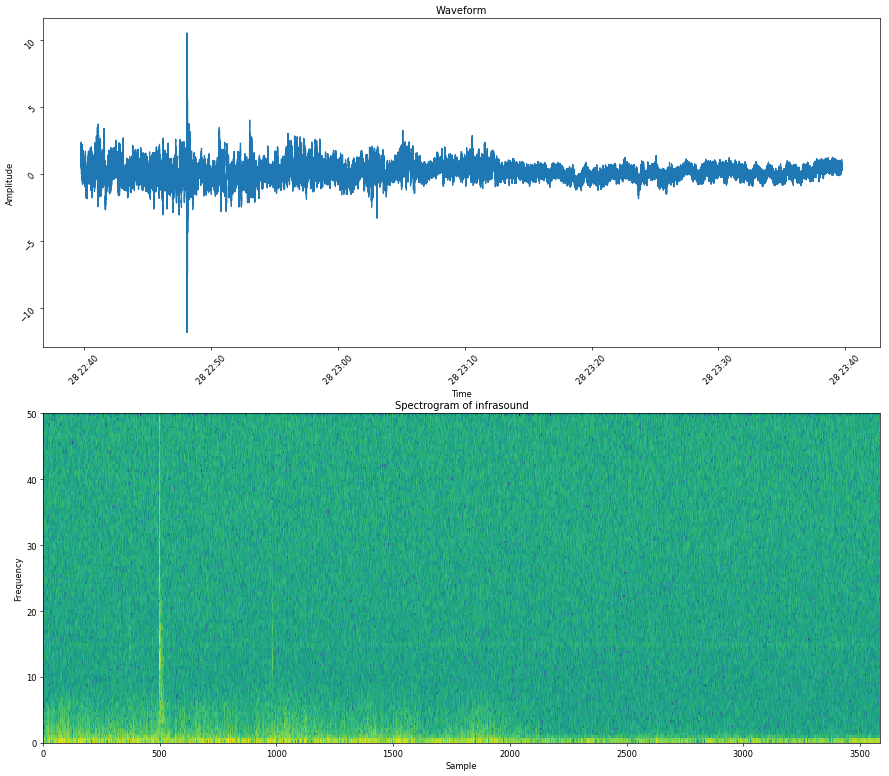

In [3]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['savefig.dpi'] = 60
# mpl.rcParams['figure.dpi'] = 60

#fig,ax = plt.subplot()
#fig.autofmt_xdate()
fig = plt.figure(figsize=(18,16), dpi=60) # (width, height) in inches.
ax1, ax2 = fig.subplots(2)

ax1.plot(utc,signal)
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.specgram(signal,Fs=sampling_frequency)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

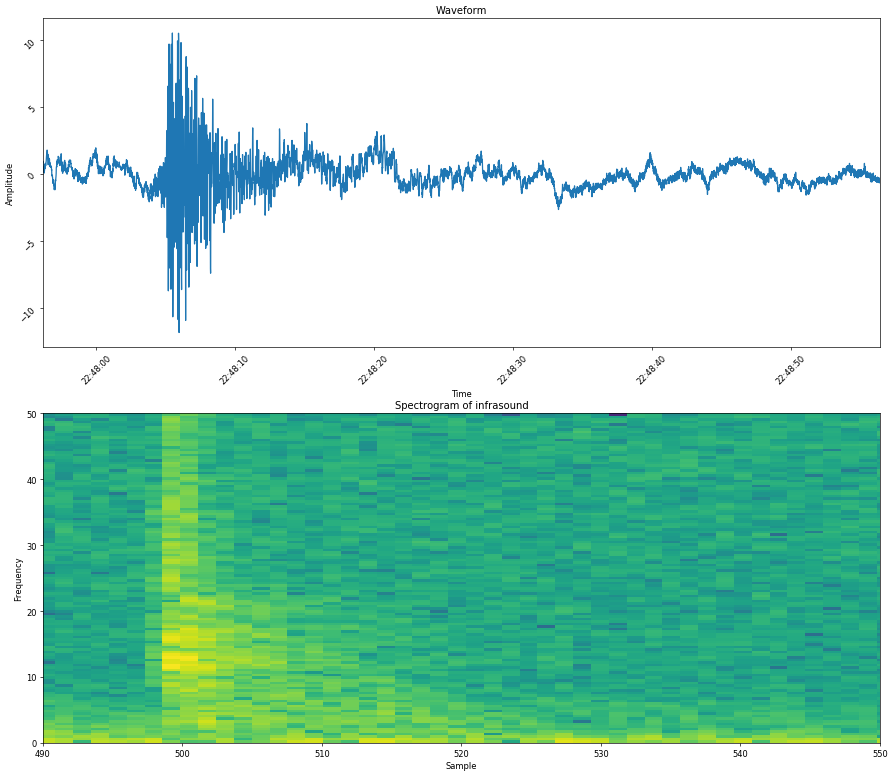

In [3]:
fig = plt.figure(figsize=(18,16), dpi=60) # (width, height) in inches.
ax1, ax2 = fig.subplots(2)
ax1.plot(utc,signal)
ax1.set_xlim([utc[49000],utc[55000]])
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.specgram(signal,Fs=sampling_frequency)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlim([490,550])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

EMD sobre infrasonido para limpieza >> observar si se observan las mismas frecuencias en infrasonido que en el sismógrafo. <br>
Diferencia de tiempo de arribo >> debería verse en coherencia, como diferencias de fase. <br>
<br>
Dani >> datos de equipo de gases?? <br>


In [ ]:
from obspy import read

st = read('201729030100-W5745-6C35E4.sac')
print(st[0])
sismo = st.plot()

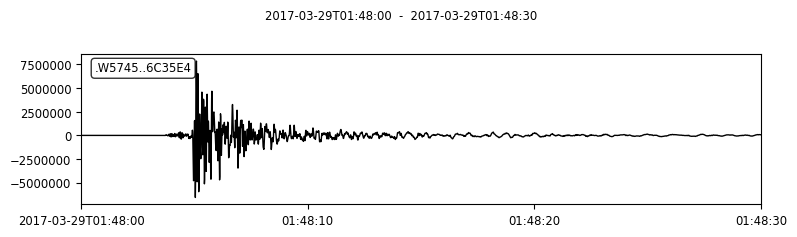

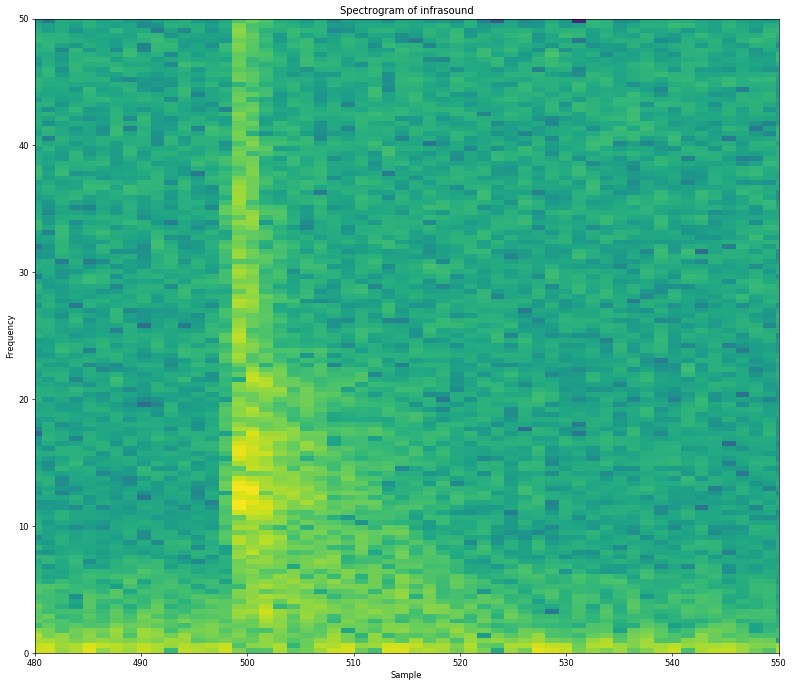

In [5]:
dt = st[0].stats.starttime
sismo_cut = st.plot(starttime = dt+48*60, endtime=dt+48*60+30)

fig5 = plt.figure(figsize=(18,16), dpi=60) # (width, height) in inches.
ax5 = fig5.add_subplot(111)
ax5.specgram(signal,Fs=sampling_frequency)
ax5.set_title('Spectrogram of infrasound')
ax5.set_xlim([480,550])
ax5.set_xlabel('Sample')
ax5.set_ylabel('Frequency')
plt.show()

In [10]:
import pycwt
# wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(signal,1.0)

In [ ]:
# Normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (seconds)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

In [8]:
"""Inicialización """

from __future__ import division
import pycwt as wavelet
from pycwt.helpers import find

# We load the dataset and define some data related parameters. In this
# case, the first 19 lines of the data file contain meta-data, that we ignore,
# since we set them manually (*i.e.* title, units).
dat = signal[40000:60000]
N = len(dat)
title = 'Una traza de infrasonido de porqueria'
label = '2017 03 28'
units = 'Pa'
t0 = 0
dt = 0.01  # En segundos

# We also create a time array.
t = np.arange(0, N) * dt + t0

In [56]:
print(len(dat), '  >>>  ',len(t))

20000   >>>   20000


In [10]:
# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.
p = np.polyfit(t, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [11]:
# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [12]:
# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [13]:
# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

In [14]:
# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [16]:
# Then, we calculate the global wavelet spectrum and determine its
# significance level.
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [17]:
# We also calculate the scale average between 2 years and 8 years, and its
# significance level.
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

/home/didier/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


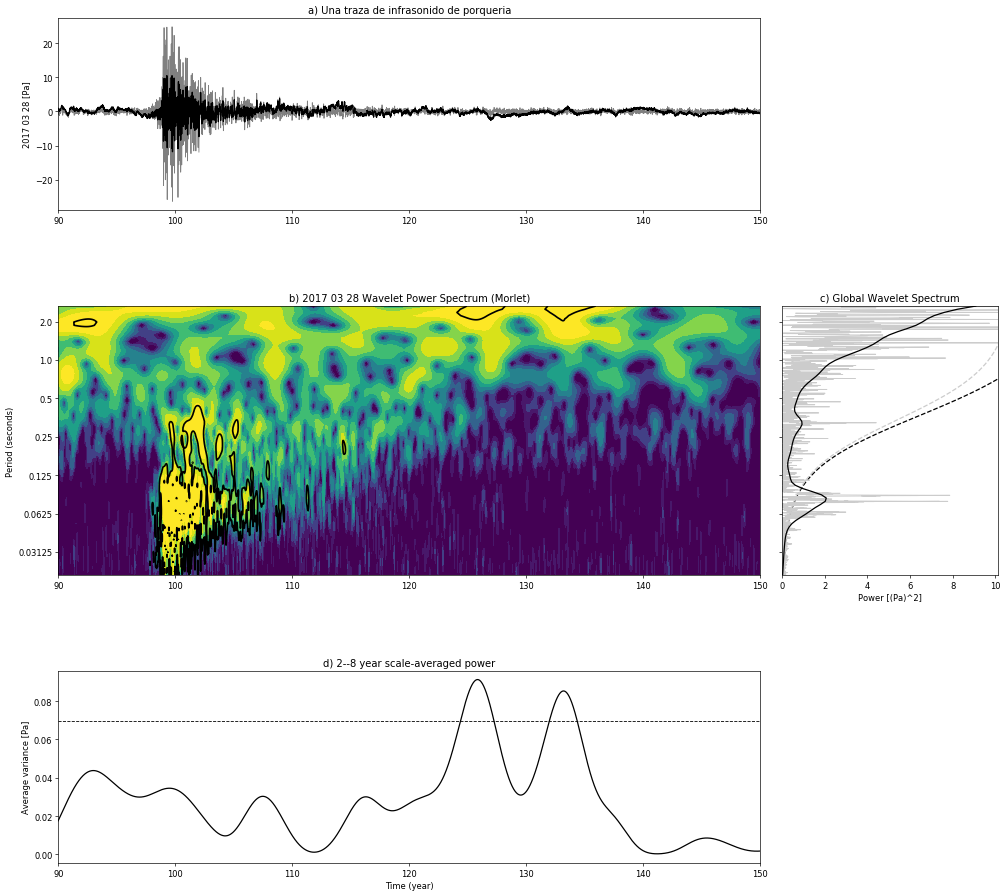

In [37]:
# Finally, we plot our results in four different subplots containing the
# (i) original series anomaly and the inverse wavelet transform; (ii) the
# wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# levels are either included as dotted lines or as filled contour lines.

# Prepare the figure
# plt.close('all')
# plt.ioff()
# figprops = dict(figsize=(18, 16), dpi=60)
# fig5 = plt.figure(figsize=(16,14), dpi=60) # (width, height) in inches
# fig = plt.figure(**figprops)
fig = plt.figure(figsize=(18, 16), dpi=60)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (seconds)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--')
cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = plt.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
#ax.set_xlim([t.min(), t.max()])
ax.set_xlim([90, 150])
plt.show()

In [49]:
from PyEMD import EMD
IMFs = EMD(dat)

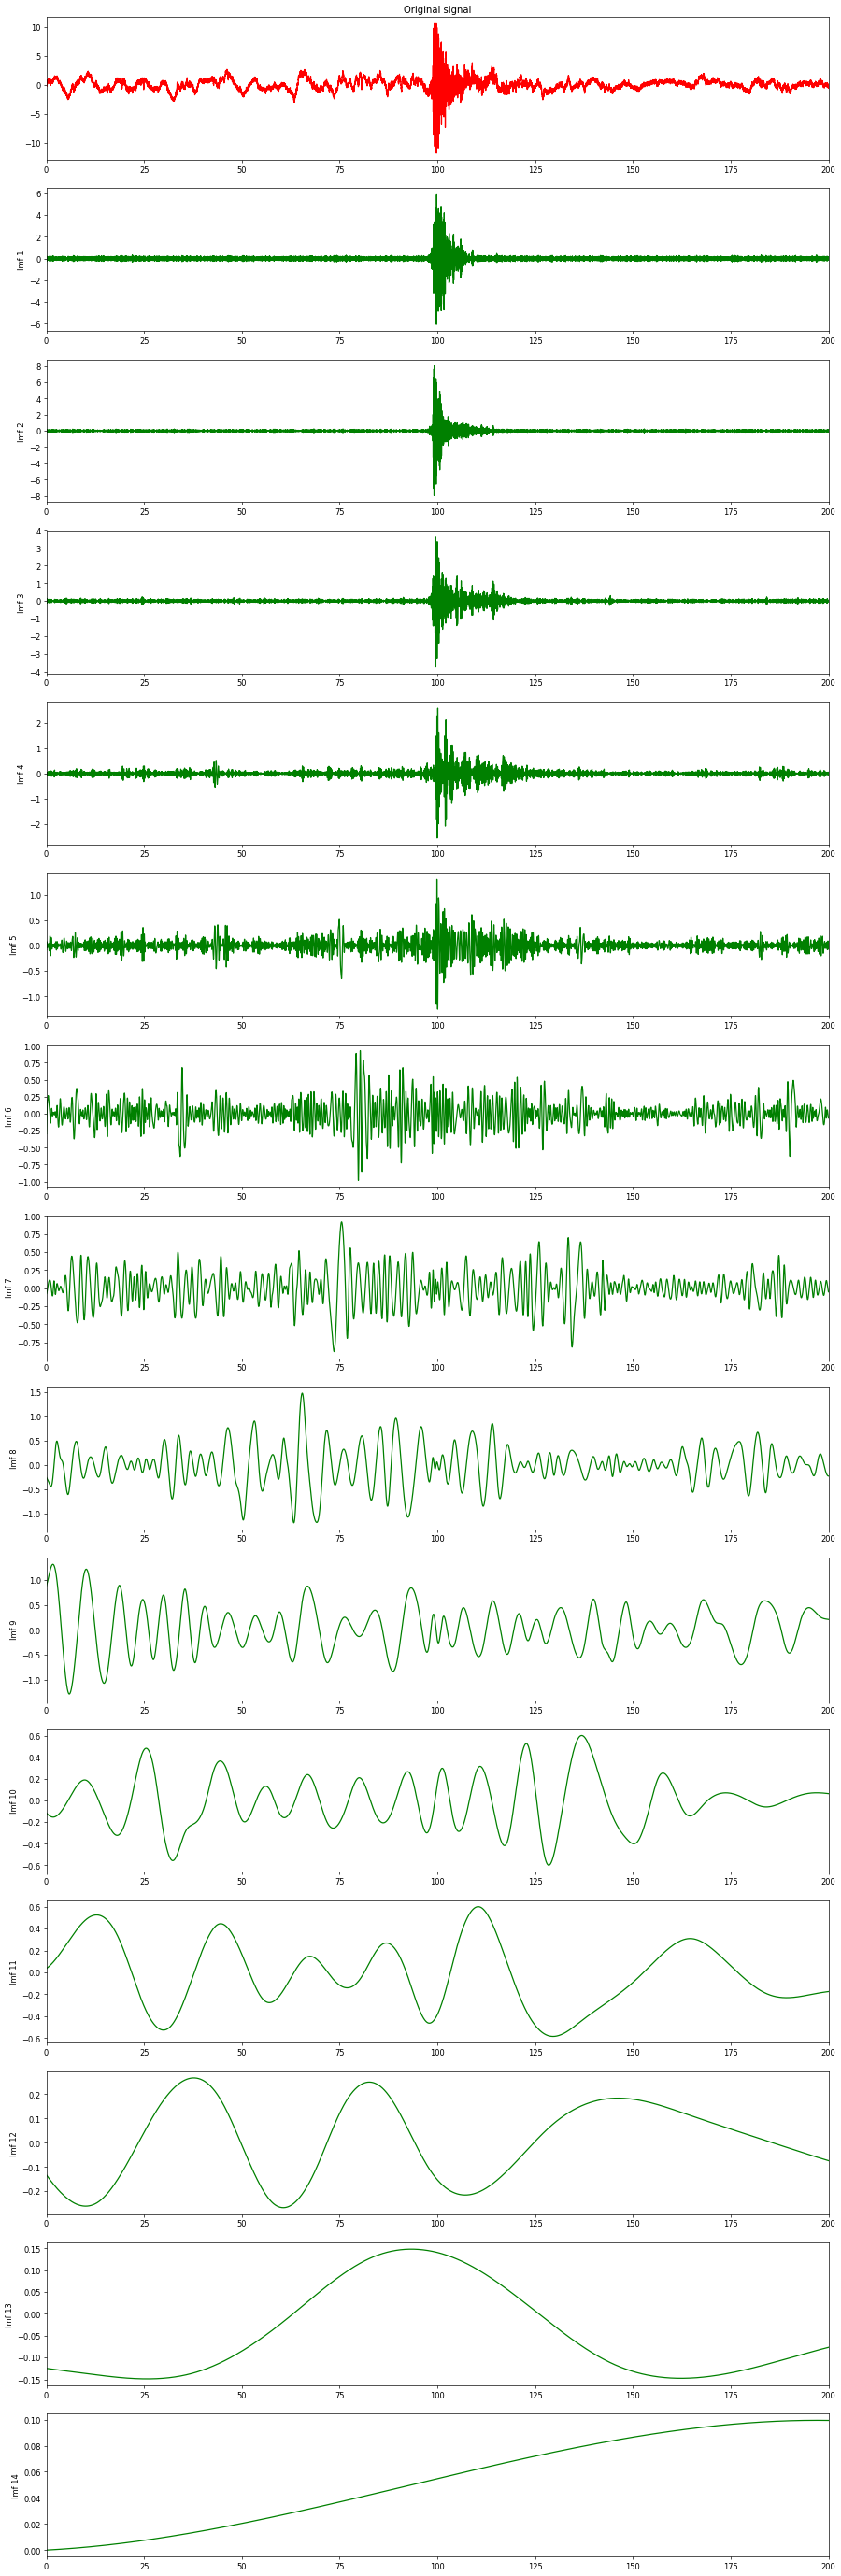

In [68]:
# EMD options
max_imf = -1
DTYPE = np.float64

# Signal options
T = t
S = np.array(dat)
tMin, tMax = t[0], t[-1]

# Prepare and run EMD
emd = EMD()
emd.FIXE_H = 5
emd.nbsym = 2
emd.spline_kind = 'cubic'
emd.DTYPE = DTYPE

imfs = emd.emd(S, T, max_imf)
imfNo = imfs.shape[0]

# Plot results
c = 1
r = np.ceil((imfNo+1)/c)

plt.ioff()
plt.figure(figsize=(18, 60), dpi=60) # (width, height) in inches.
plt.subplot(r, c, 1)
plt.plot(T, S, 'r')
plt.xlim((tMin, tMax))
plt.title("Original signal")

for num in range(imfNo):
    plt.subplot(r,c,num+2)
    plt.plot(T, imfs[num], 'g')
    plt.xlim((tMin, tMax))
    plt.ylabel("Imf "+str(num+1))

#plt.tight_layout()
plt.show()

Suma de 3 o 4 primeros modos (sum3, sum4), transformada wavelet de eso, y coherencia con el sismografo. <br>
Transformada de Hilbert sobre sum3/4 para saber el contenido de frecuencias. <br>

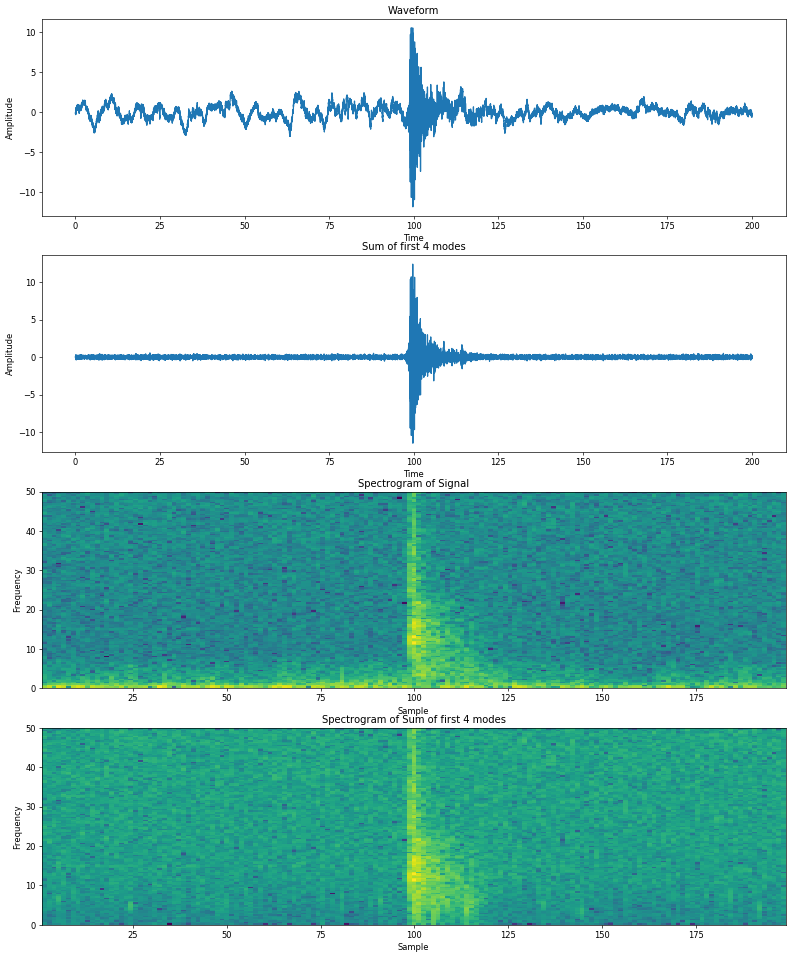

In [83]:
sum4 = np.zeros([np.size(imfs[0])])
for modo in imfs[:3]:
    sum4 = sum4 + modo

fig11 = plt.figure(figsize=(16, 20), dpi=60) # (width, height) in inches.
ax111 , ax112, ax113, ax114 = fig11.subplots(4)

ax111.plot(T,S)
ax111.set_title('Waveform')
ax111.set_xlabel('Time')
ax111.set_ylabel('Amplitude')

ax112.plot(T,sum4)
ax112.set_title('Sum of first 4 modes')
ax112.set_xlabel('Time')
ax112.set_ylabel('Amplitude')

ax113.specgram(S,Fs=100)
ax113.set_title('Spectrogram of Signal')
ax113.set_xlabel('Sample')
ax113.set_ylabel('Frequency')

ax114.specgram(sum4,Fs=100)
ax114.set_title('Spectrogram of Sum of first 4 modes')
ax114.set_xlabel('Sample')
ax114.set_ylabel('Frequency')

plt.show()

Comparacion de los FFT de la filtrada y la completa. <br>
Ahora suma de los modos que no usé y espectro de eso. <br>
Datos meteorológicos >>> velocidad de viento, y comparación con los datos de infrasonido en las zonas donde no hay evento V-T. <br>